In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
credit_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\German Credit Data.csv')

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
credit_df.iloc[0:5, 0:7]


,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [6]:
credit_df.iloc[0:5, 7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [7]:
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [8]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [9]:
encoded_credit_df= pd.get_dummies(credit_df[X_features], drop_first= True)

In [10]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [11]:
print(encoded_credit_df.dtypes)

duration                 int64
amount                   int64
inst_rate                int64
residing_since           int64
age                      int64
num_credits              int64
checkin_acc_A12           bool
checkin_acc_A13           bool
checkin_acc_A14           bool
credit_history_A31        bool
credit_history_A32        bool
credit_history_A33        bool
credit_history_A34        bool
savings_acc_A62           bool
savings_acc_A63           bool
savings_acc_A64           bool
savings_acc_A65           bool
present_emp_since_A72     bool
present_emp_since_A73     bool
present_emp_since_A74     bool
present_emp_since_A75     bool
personal_status_A92       bool
personal_status_A93       bool
personal_status_A94       bool
inst_plans_A142           bool
inst_plans_A143           bool
job_A172                  bool
job_A173                  bool
job_A174                  bool
dtype: object


In [12]:
boolean_columns = encoded_credit_df.select_dtypes(include= ['bool']).columns
for col in boolean_columns:
    encoded_credit_df[col] = encoded_credit_df[col].astype(int)


In [13]:
X= sm.add_constant(encoded_credit_df)

In [14]:
Y= credit_df.status

In [15]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state = 42)

In [16]:
logit= sm.Logit(Y_train, X_train)
logit_model =  logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [17]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2025-04-15 22:53  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

In [18]:
def get_significant_vars(lm):
    var_p_vals_df= pd.DataFrame(lm.pvalues) # store the pvalues and corresponding  names in a dataframe
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])

In [19]:
significant_vars= get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [20]:
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [21]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2025-04-15 22:53 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [22]:
Y_pred_df= pd.DataFrame({"actual": Y_test, "predicted_prob":final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [23]:
Y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [24]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x : 1 if x> 0.5 else 0 )
Y_pred_df.sample(10 , random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [26]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual, predicted, labels= [1,0])
    sn.heatmap(cm, annot = True, fmt= '.2f', xticklabels= ["Bad credit", "Good credit"], yticklabels= ["bad credit", "Good credit"])
    plt.ylabel("True label")
    plt.xlabel('Predicted label')
    plt.show()

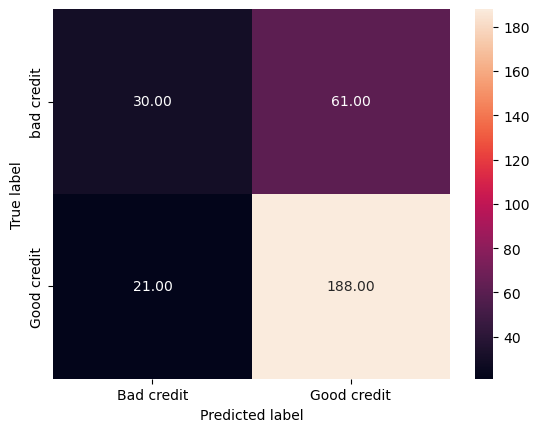

In [27]:
draw_cm(Y_pred_df['actual'], Y_pred_df['predicted'])

In [28]:
from sklearn import metrics
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted))


              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



<Figure size 800x600 with 0 Axes>

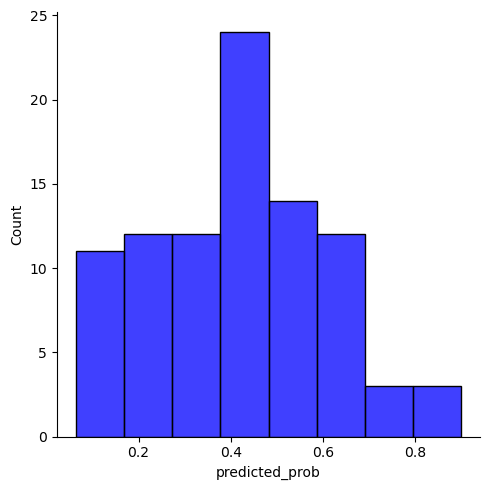

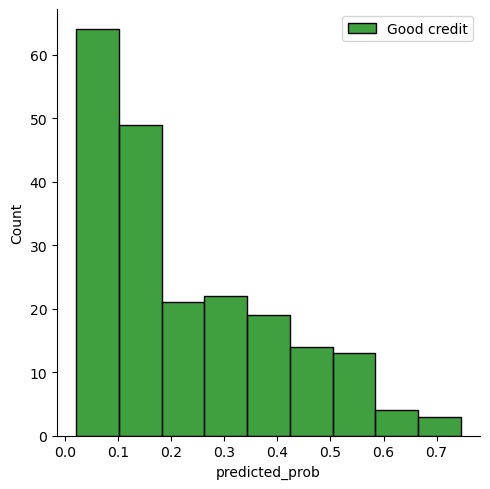

In [29]:
plt.figure(figsize= (8,6))
sn.displot(Y_pred_df[Y_pred_df.actual == 1]["predicted_prob"], kde= False, color = 'b', label= 'Bad credit')
sn.displot(Y_pred_df[Y_pred_df.actual == 0]["predicted_prob"], kde= False, color= 'g', label= 'Good credit')
plt.legend()
plt.show()

In [30]:
def draw_roc(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual , probs)
    plt.figure(figsize = (8,6))
    plt.plot(fpr,tpr, label= 'ROC curve (area= %0.2f)' %auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim(0.0,1.05)
    plt.xlabel('False Positive Rate or [1- True Negative Rate ]')
    plt.ylabel ('True Positive Rate')
    plt.legend(loc = "lower right")
    plt.show()
    return fpr, tpr, thresholds

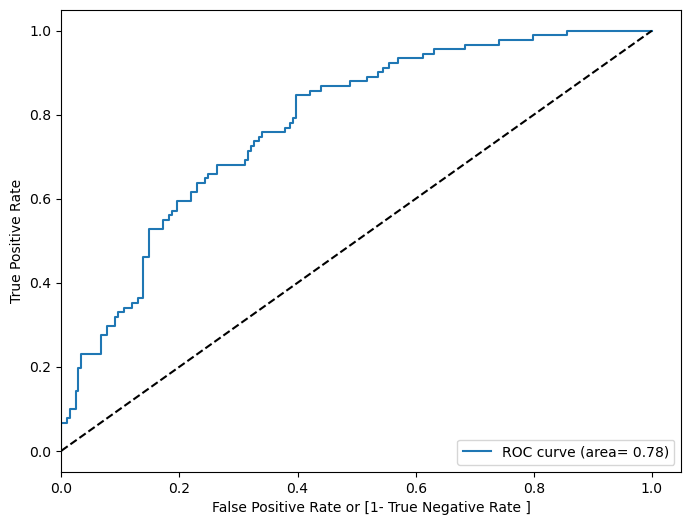

In [31]:
fpr, tpr,thresholds = draw_roc(Y_pred_df.actual, Y_pred_df.predicted_prob)

In [32]:
auc_score = metrics.roc_auc_score(Y_pred_df.actual, Y_pred_df.predicted_prob)

round( float(auc_score),2)

0.78

In [33]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr' :fpr,'thresholds': thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff' , ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [34]:
Y_pred_df['predicted_new'] = Y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.22 else 0)

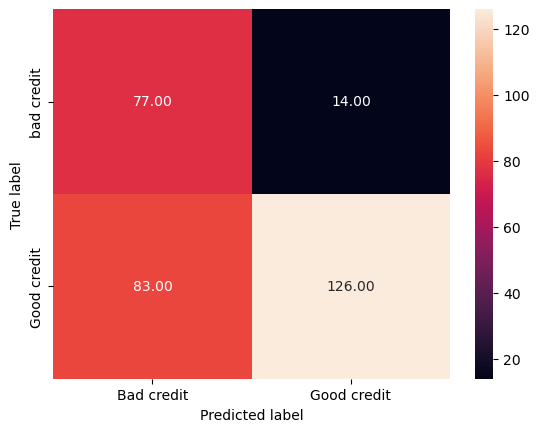

In [35]:
draw_cm(Y_pred_df.actual, Y_pred_df.predicted_new)

In [36]:
def get_total_cost(actual, predicted, cost_FPs, cost_FNs):
    cm = metrics.confusion_matrics(actual, predicted,(1,0))
    cm_mat = np.array(cm)
    return cm_mat[0,1] *cost_FNs + cm_mat[1,0] * cost_FPs

In [37]:
cost_df = pd.DataFrame(columns= ['prob' , 'cost'])

In [38]:
Y = credit_df.status
X = encoded_credit_df

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.3, random_state = 42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [41]:
clf_tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3)

In [42]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(Y_test, tree_predict)

0.5835743204164258

In [43]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image